<a href="https://colab.research.google.com/github/fadillarizalul/thesis-alzheimer/blob/main/alzheimer_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# set up dan inisialisasi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#import data dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget --no-check-certificate \
https://github.com/fadillarizalul/thesis-alzheimer/raw/main/dataset/3%20classes%20alzheimer.zip \
  -O 3-classes-alzheimer.zip

--2022-08-31 09:04:13--  https://github.com/fadillarizalul/thesis-alzheimer/raw/main/dataset/3%20classes%20alzheimer.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fadillarizalul/thesis-alzheimer/main/dataset/3%20classes%20alzheimer.zip [following]
--2022-08-31 09:04:13--  https://raw.githubusercontent.com/fadillarizalul/thesis-alzheimer/main/dataset/3%20classes%20alzheimer.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14145599 (13M) [application/zip]
Saving to: ‘3-classes-alzheimer.zip’

3-classes-alzheimer 100%[===================>]  13.49M  --.-KB/s    in 0.06s   

2022-08-31 0

Extracting ZIP files

In [3]:
!unzip /content/3-classes-alzheimer.zip

Archive:  /content/3-classes-alzheimer.zip
   creating: 3 classes alzheimer/
   creating: 3 classes alzheimer/AD 20 patients/
  inflating: 3 classes alzheimer/AD 20 patients/img-00001-00001.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00001-00002.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00001-00003.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00001-00004.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00001-00005.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00002-00001.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00002-00002.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00002-00003.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00002-00004.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00002-00005.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00003-00001.jpg  
  inflating: 3 classes alzheimer/AD 20 patients/img-00003-00002.jpg  
  inflating: 3 classes alzheimer/A

Create base directory for each classes

In [4]:
import os
 #lokasi direktori dasar
dir_base ='/content/3 classes alzheimer'
os.listdir(dir_base)
print(os.listdir(dir_base))

#hitung jumlah file per direktori
data_cn = len(os.listdir('/content/3 classes alzheimer/CN 20 patients'))
data_mci = len(os.listdir('/content/3 classes alzheimer/MCI 20 patients')) 
data_ad = len(os.listdir('/content/3 classes alzheimer/AD 20 patients')) 

print("Amount of CN class images:", data_cn)
print("Amount of MCI class images:", data_mci)
print("Amount of AD class images:", data_ad)

['MCI 20 patients', 'AD 20 patients', 'CN 20 patients']
Amount of CN class images: 101
Amount of MCI class images: 100
Amount of AD class images: 108


# augmentasi dan split data

image data generator dan split data dengan 80 20

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

# valid_datagen = ImageDataGenerator(rescale = 1./255,
#                                    validation_split = 0.2)

# test_datagen  = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory = dir_base,
    target_size = (256,256),
    batch_size = 16,
    class_mode = 'categorical',
    subset='training'
)
 
val_generator = train_datagen.flow_from_directory(
    directory = dir_base,
    target_size = (256,256),
    batch_size = 16,
    class_mode = 'categorical',
    subset='validation'
)

Found 248 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


# create model architecture

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

# model = Sequential()

# # Layer CNN pertama
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150,150,3)))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))

# # Layer CNN kedua
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))

# # Layer CNN ketiga
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# model.summary()

In [26]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 516128)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               66064512  
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                      

In [36]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (256, 256, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (256, 256, 3), kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D())

model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 3, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 131072)           

# modelling

In [19]:
# train_len = 0
# for foldername in os.listdir('/content/alzheimer-mri-dataset/Alzheimers-ADNI/train'):
#     train_len = train_len + len(os.listdir(os.path.join('/content/alzheimer-mri-dataset/Alzheimers-ADNI/train',foldername)))
    
# val_len = 0
# for foldername in os.listdir('/content/alzheimer-mri-dataset/Alzheimers-ADNI/test'):
#     val_len = val_len + len(os.listdir(os.path.join('/content/alzheimer-mri-dataset/Alzheimers-ADNI/test',foldername)))

# print(train_len)
# print(val_len)

In [37]:
model_history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 30,
                        verbose = 1)

Epoch 1/30
16/16 [==============================] - 6s 305ms/step - loss: 5.2607 - accuracy: 0.3468 - val_loss: 1.4026 - val_accuracy: 0.2295
Epoch 2/30
16/16 [==============================] - 4s 283ms/step - loss: 1.2082 - accuracy: 0.3669 - val_loss: 1.1979 - val_accuracy: 0.3115
Epoch 3/30
16/16 [==============================] - 4s 281ms/step - loss: 1.1000 - accuracy: 0.3992 - val_loss: 1.1403 - val_accuracy: 0.3443
Epoch 4/30
16/16 [==============================] - 4s 281ms/step - loss: 1.0728 - accuracy: 0.4315 - val_loss: 1.1950 - val_accuracy: 0.2459
Epoch 5/30
16/16 [==============================] - 5s 332ms/step - loss: 1.0905 - accuracy: 0.3750 - val_loss: 1.2188 - val_accuracy: 0.2459
Epoch 6/30
16/16 [==============================] - 4s 282ms/step - loss: 1.0451 - accuracy: 0.4435 - val_loss: 1.2590 - val_accuracy: 0.2951
Epoch 7/30
16/16 [==============================] - 4s 283ms/step - loss: 1.0114 - accuracy: 0.5081 - val_loss: 1.3598 - val_accuracy: 0.2951
Epoch 

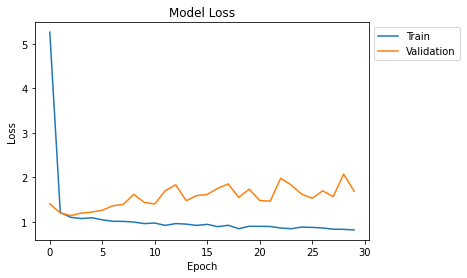

In [38]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

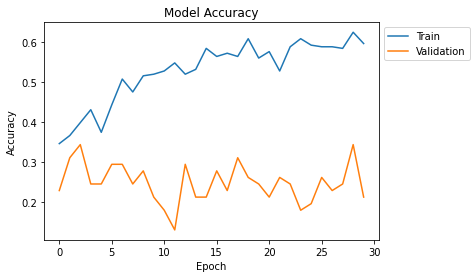

In [39]:
# Summarize history for loss

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [16]:
prediction= model.predict(val_generator, steps=np.ceil(val_generator.samples/val_generator.batch_size), verbose=2)
prediction= (prediction > 0.5)
val_labels=val_generator.classes

4/4 - 1s - 958ms/epoch - 239ms/step


In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

print(classification_report(val_generator.classes, prediction))

ValueError: ignored